In [1]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np
import librosa
import scipy

22050


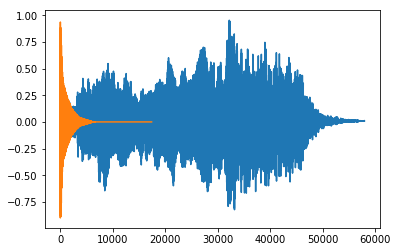

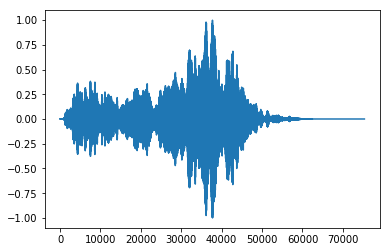

In [2]:
# Load the data and calculate the time of each sample
e_data, e_samplerate  = librosa.load('elefante.wav')
b_data, b_samplerate = librosa.load('Garrafa.wav')

print(e_samplerate)

r_data = np.convolve(e_data, b_data)
r_data /= np.max(np.abs(r_data),axis=0)


plt.plot(e_data)
plt.plot(b_data)
plt.show()
plt.plot(r_data)
librosa.output.write_wav('elefante_na_garrafa.wav', r_data, e_samplerate)

In [3]:
import IPython.display as ipd
ipd.Audio('elefante_na_garrafa.wav') # load a local WAV file

# Project Solution

## 1 Introduction

In [4]:
# Simulate recording of impulse response 
# h[k]: Real impulse response
# w[k]: White noise used to excite impulse response 
# n[k]: White measurement noise (var=0.01)
# r[k] = w[k] ∗ h[k] + n[k].
h, samplerate = librosa.load('Garrafa.wav')
h /= np.max(np.abs(h),axis=0)

def make_measurement(h, num_samples=20000):
    print(samplerate)
    w = np.random.normal(0, 1, size=num_samples)

    n_var=0.01
    n = np.random.normal(0, np.sqrt(n_var), size=num_samples)
#     plt.plot(n)
#     plt.show()

    r = scipy.signal.convolve(w, h) 
    # r = r/sum(h)
    # r /= np.max(np.abs(r),axis=0)
    # r = r*(1/num_samples)
    # r = r[num_samples-1:]

#     plt.plot(r)
    # plt.plot(r)

#     librosa.output.write_wav('r_simulation.wav', r, samplerate)
#     wavfile.write('r_simulation.wav', samplerate, r)
    return w, r

In [5]:
import IPython.display as ipd
ipd.Audio('r_simulation.wav') # load a local WAV file

In [6]:
def estimation_error(estimation, original):
    return np.sum((estimation - original)**2)/np.sum(original**2)

# print(estimation_error(r, h))

## 2 Correlation Estimator

22050


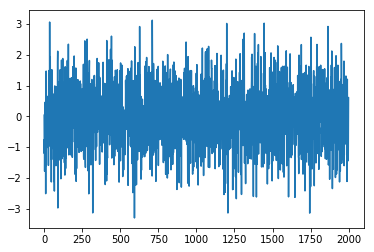

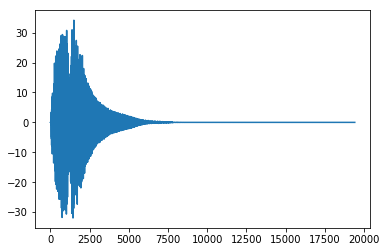

In [7]:
num_samples=2000
w, r = make_measurement(h, num_samples)
plt.plot(w)
plt.show()
plt.plot(r)


0.021671946516969215
Estimation error = 0.6292780976329271


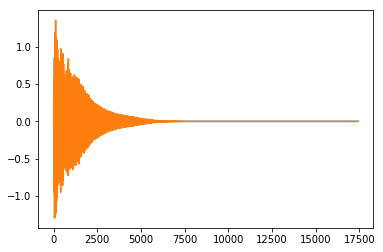

In [8]:
#METHOD 1
ro = np.convolve(r, w[::-1])/len(w)
ro = ro[num_samples-1:num_samples+len(h)-1]
plt.plot(h)
plt.plot(ro)
print(np.var(ro))
wavfile.write('ro.wav', samplerate, ro)
ipd.Audio('ro.wav') # load a local WAV file
print("Estimation error = {}".format(estimation_error(ro, h)))

[ 100  200  300  400  500  600  700  800  900 1000 1100 1200 1300 1400
 1500 1600 1700 1800 1900]
19418
2000
Estimation error = 0.943987406219588


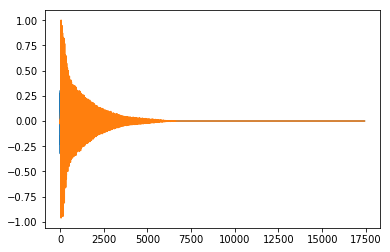

In [9]:
#METHOD 2
sub_sample=100
indices = np.arange(sub_sample, len(w), sub_sample)
print(indices)

print(len(r))
print(len(w))

r_list = np.split(r, indices)
w_list = np.split(w, indices)


ro_list = []

for i in range(len(r_list)-1):
#     i=2
#     plt.plot(r_list[i])
#     plt.plot(w_list[i])
#     plt.show()

    ro = np.convolve(r_list[i], w_list[i][::-1])/len(w_list[i])
    ro = ro[sub_sample-1:sub_sample+len(h)-1]
    ro = np.pad(ro, (0, len(h)-len(ro)), 'constant')
#     plt.plot(ro)
#     plt.show()
#     print(len(ro))
# #     print(np.var(ro))
#     print("Estimation error = {}".format(estimation_error(ro, h)))
    ro_list.append(ro)
    

ro = sum(ro_list)/len(ro_list)
plt.plot(ro)
plt.plot(h)
print("Estimation error = {}".format(estimation_error(ro, h)))
wavfile.write('ro.wav', samplerate, ro)
ipd.Audio('ro.wav') # load a local WAV file


22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
Estimation error = 0.0442923993326924


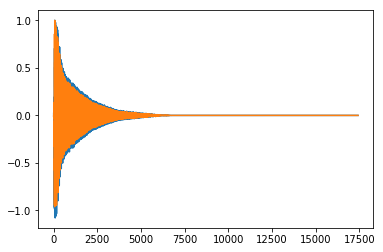

In [10]:
ro_list = []
for i in range(20):
    num_samples=100
    w, r = make_measurement(h, num_samples)
    #METHOD 1
    ro = np.convolve(r, w[::-1])/len(w)
    ro = ro[num_samples-1:num_samples+len(h)-1]
    ro_list.append(ro)
    
ro = sum(ro_list)/len(ro_list)
plt.plot(ro)
plt.plot(h)
print("Estimation error = {}".format(estimation_error(ro, h)))
wavfile.write('ro.wav', samplerate, ro)
ipd.Audio('ro.wav') # load a local WAV file

# PART 4

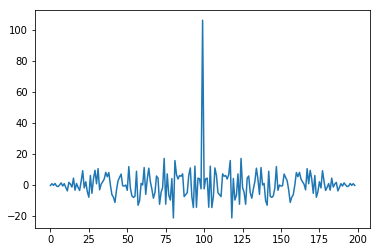

In [61]:
w_corr = np.convolve(w, w[::-1])
plt.plot(w_corr)

In [62]:
start = len(w)-1
w_corr_matrix = w_corr[start:start+len(w)]
print(len(w_corr[start:start+len(w)]))

for i in range(1, len(w)):
    start = len(w)-1-i
    print(start, len(w_corr[start:start+len(w)]))
    w_corr_matrix = np.vstack((w_corr_matrix, w_corr[start:start+len(w)]))
    
print(w_corr_matrix)

100
98 100
97 100
96 100
95 100
94 100
93 100
92 100
91 100
90 100
89 100
88 100
87 100
86 100
85 100
84 100
83 100
82 100
81 100
80 100
79 100
78 100
77 100
76 100
75 100
74 100
73 100
72 100
71 100
70 100
69 100
68 100
67 100
66 100
65 100
64 100
63 100
62 100
61 100
60 100
59 100
58 100
57 100
56 100
55 100
54 100
53 100
52 100
51 100
50 100
49 100
48 100
47 100
46 100
45 100
44 100
43 100
42 100
41 100
40 100
39 100
38 100
37 100
36 100
35 100
34 100
33 100
32 100
31 100
30 100
29 100
28 100
27 100
26 100
25 100
24 100
23 100
22 100
21 100
20 100
19 100
18 100
17 100
16 100
15 100
14 100
13 100
12 100
11 100
10 100
9 100
8 100
7 100
6 100
5 100
4 100
3 100
2 100
1 100
0 100
[[106.08202712  -2.72956773   3.79058485 ...  -0.4826448    0.60527704
   -0.51430215]
 [ -2.72956773 106.08202712  -2.72956773 ...   0.76033709  -0.4826448
    0.60527704]
 [  3.79058485  -2.72956773 106.08202712 ...  -0.91454843   0.76033709
   -0.4826448 ]
 ...
 [ -0.4826448    0.76033709  -0.91454843 ... 106